- Author: Peter Riesebos
- Purpose: Comparison of different imputation output with varying minimac4 chunk size values, to see if this has an influence on the imputation quality (for example the R2 imputation score).
- Input: imputed vcf file metrics
- Output: graphs

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

print("imports done")

imports done


In [3]:
three_hundred_mb = pd.read_csv("/scratch/hb-functionalgenomics/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/SRP129004/genotyping_output/chr1/postimpute/chr1_300mb.txt", delim_whitespace=True, header=None, names=["CHROM", "POS", "ID", "REF", "ALT", "QUAL", "FILTER", "INFO", "FORMAT"])

/tmp/ipykernel_2803885/2918391971.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  three_hundred_mb = pd.read_csv("/scratch/hb-functionalgenomics/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/SRP129004/genotyping_output/chr1/postimpute/chr1_300mb.txt", delim_whitespace=True, header=None, names=["CHROM", "POS", "ID", "REF", "ALT", "QUAL", "FILTER", "INFO", "FORMAT"])


In [4]:
fifty_mb = pd.read_csv("/scratch/hb-functionalgenomics/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/SRP129004/genotyping_output/chr1-50mb/postimpute/chr1_50mb.txt", delim_whitespace=True, header=None, names=["CHROM", "POS", "ID", "REF", "ALT", "QUAL", "FILTER", "INFO", "FORMAT"])

/tmp/ipykernel_2803885/3964726368.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fifty_mb = pd.read_csv("/scratch/hb-functionalgenomics/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/SRP129004/genotyping_output/chr1-50mb/postimpute/chr1_50mb.txt", delim_whitespace=True, header=None, names=["CHROM", "POS", "ID", "REF", "ALT", "QUAL", "FILTER", "INFO", "FORMAT"])


In [5]:
def split_info_column(df, info_column_name):
    """
    Split the INFO column into multiple columns of key-value pairs.

    Parameters:
    - df (pandas.DataFrame): DataFrame containing the INFO column.
    - info_column_name (str): Name of the INFO column.

    Returns:
    - pandas.DataFrame: DataFrame with INFO column split into key-value pairs.
    """
    # Split the INFO column into multiple columns
    info_split = df[info_column_name].str.split(';', expand=True)

    # Extract key-value pairs and create separate columns
    for col in info_split.columns:
        key_value = info_split[col].str.split('=', expand=True)
        if key_value.shape[1] == 2:  # Check if there are key-value pairs
            key = key_value[0].iloc[0]  # Get the key name from the first row
            df[key] = key_value[1]  # Assign the values to the DataFrame

    # Drop the original INFO column
    df = df.drop(columns=[info_column_name])

    return df

In [6]:
df_fifty_final = split_info_column(fifty_mb, 'INFO')
df_three_hundred_final = split_info_column(three_hundred_mb, 'INFO')

In [15]:
df_fifty_final['AF'] = pd.to_numeric(df_fifty_final['AF'], errors='coerce')
df_fifty_final['MAF'] = pd.to_numeric(df_fifty_final['MAF'], errors='coerce')
df_fifty_final['R2'] = pd.to_numeric(df_fifty_final['R2'], errors='coerce')

df_three_hundred_final['AF'] = pd.to_numeric(df_three_hundred_final['AF'], errors='coerce')
df_three_hundred_final['MAF'] = pd.to_numeric(df_three_hundred_final['MAF'], errors='coerce')
df_three_hundred_final['R2'] = pd.to_numeric(df_three_hundred_final['R2'], errors='coerce')

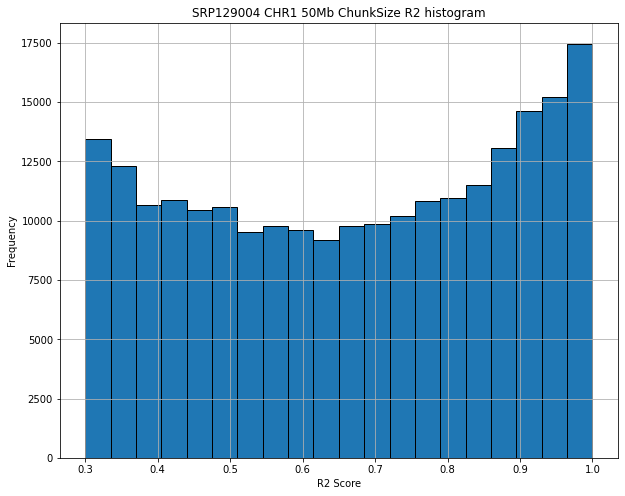

In [23]:
plt.figure(figsize=(10, 8), facecolor='white')
plt.hist(df_fifty_final['R2'],bins=20, edgecolor='black')
plt.title("SRP129004 CHR1 50Mb ChunkSize R2 histogram")
plt.xlabel("R2 Score")
plt.ylabel("Frequency")
plt.grid()
plt.show()

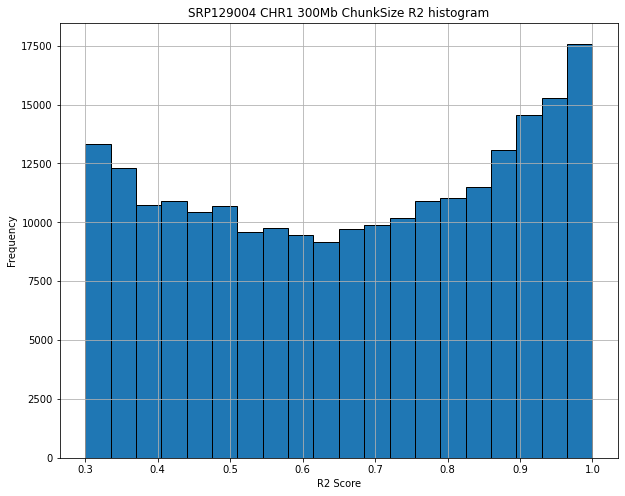

In [24]:
plt.figure(figsize=(10, 8), facecolor='white')
plt.hist(df_three_hundred_final['R2'],bins=20, edgecolor='black')
plt.title("SRP129004 CHR1 300Mb ChunkSize R2 histogram")
plt.xlabel("R2 Score")
plt.ylabel("Frequency")
plt.grid()
plt.show()

In [30]:
# Get descriptive statistics for the R2 column 50mb
r2_description_50 = df_fifty_final['R2'].describe()
print(r2_description_50)

# Get descriptive statistics for the R2 column 300mb
r2_description_300 = df_three_hundred_final['R2'].describe()
print("\n",r2_description_300)

count    229882.000000
mean          0.668525
std           0.215730
min           0.300010
25%           0.473870
50%           0.680690
75%           0.867927
max           1.000000
Name: R2, dtype: float64

 count    230085.000000
mean          0.668819
std           0.215728
min           0.300010
25%           0.474380
50%           0.681380
75%           0.868280
max           1.000000
Name: R2, dtype: float64
